In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Importujemy dane

In [167]:
delivery_data = pd.read_json('proper_data/deliveries.json')
products_data = pd.read_json('proper_data/products.json')
sessions_data = pd.read_json('proper_data/sessions.json')
users_data = pd.read_json('proper_data/users.json')

### Pierwszy wgląd

In [169]:
sessions_data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-02-26 12:45:21,102.0,1277.0,VIEW_PRODUCT,0,NaN
1,100002,2021-03-03 11:39:28,102.0,1001.0,VIEW_PRODUCT,0,NaN
2,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0
3,100003,2021-02-23 12:58:04,102.0,1286.0,VIEW_PRODUCT,5,NaN
4,100003,2021-02-23 13:02:58,102.0,1291.0,VIEW_PRODUCT,5,NaN
...,...,...,...,...,...,...,...
34841,109669,2021-03-15 03:05:31,301.0,1051.0,VIEW_PRODUCT,0,NaN
34842,109669,2021-03-15 03:07:27,301.0,1054.0,VIEW_PRODUCT,0,NaN
34843,109669,2021-03-15 03:09:55,301.0,1056.0,VIEW_PRODUCT,0,NaN
34844,109669,2021-03-15 03:13:37,NaN,1050.0,VIEW_PRODUCT,0,NaN


In [170]:
products_data

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [125]:
delivery_data

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2021-03-03T11:40:23,2021-03-06T11:44:19,516.0
1,20002,2021-02-23T13:36:43,2021-02-25T13:38:55,360.0
2,20003,2021-03-13T17:58:13,2021-03-17T18:00:19,620.0
3,20004,2021-03-08T05:11:22,2021-03-10T05:13:50,360.0
4,20005,2021-03-03T18:11:04,2021-03-07T18:11:59,620.0
...,...,...,...,...
4851,24852,2021-02-27T18:42:10,2021-03-03T18:45:04,620.0
4852,24853,2021-02-14T03:13:25,2021-02-17T03:17:01,516.0
4853,24854,2021-03-11T01:39:05,2021-03-15T01:42:30,516.0
4854,24855,2021-03-01T22:07:12,2021-03-03T22:10:17,620.0


In [126]:
users_data

,user_id,name,city,street
0,102,Dominik Fryś,Warszawa,ulica Jagiellońska 47/15
1,103,Tymon Michalczak,Gdynia,aleja Kraszewskiego 45/79
2,104,Kamil Żmija,Police,plac Lazurowa 60
3,105,Julianna Kurzac,Radom,pl. Truskawkowa 481
4,106,Dominik Turoń,Mielec,al. Piwna 146
...,...,...,...,...
195,297,Sandra Kołpak,Mielec,al. Górnicza 84/12
196,298,Kaja Działa,Gdynia,al. Mazurska 12/51
197,299,Jerzy Matynia,Konin,ul. Leszczynowa 50
198,300,Robert Wasil,Gdynia,ul. Miodowa 87


### Userzy rozłożeni po miastach

In [171]:
city_user_count = pd.DataFrame(users_data.groupby('city').count()['user_id'])
city_user_count['city'] = city_user_count.index

city_user_count = city_user_count.rename(columns={
    "user_id": "count_users"
})


city_user_count

,count_users,city
city,,
Gdynia,21,Gdynia
Konin,23,Konin
Kutno,27,Kutno
Mielec,31,Mielec
Police,17,Police
Radom,26,Radom
Szczecin,27,Szczecin
Warszawa,28,Warszawa


### Jak dużo sesji zakończyło się sukcesem?

In [172]:
sessions_data[sessions_data['event_type'] == "BUY_PRODUCT"]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,100002,2021-03-03 11:40:23,102.0,1001.0,BUY_PRODUCT,0,20001.0
13,100003,2021-02-23 13:36:43,102.0,1288.0,BUY_PRODUCT,5,20002.0
24,100005,2021-03-13 17:58:13,NaN,1293.0,BUY_PRODUCT,20,20003.0
28,100006,2021-03-08 05:11:22,102.0,1073.0,BUY_PRODUCT,20,20004.0
32,100009,2021-03-03 18:11:04,102.0,1035.0,BUY_PRODUCT,0,20005.0
...,...,...,...,...,...,...,...
34824,109663,2021-02-27 18:42:10,301.0,1283.0,BUY_PRODUCT,5,24852.0
34827,109664,2021-02-14 03:13:25,301.0,1277.0,BUY_PRODUCT,0,24853.0
34834,109666,2021-03-11 01:39:05,301.0,1047.0,BUY_PRODUCT,0,24854.0
34836,109667,2021-03-01 22:07:12,301.0,1319.0,BUY_PRODUCT,0,24855.0


### Ile sesji zakończyło się sukcesem per user?

In [173]:
successful_sessions = sessions_data[sessions_data['event_type'] == 'BUY_PRODUCT']

num_sessions = pd.DataFrame(
    sessions_data[sessions_data['event_type'] == 'BUY_PRODUCT']
    .groupby('user_id')
    .count()["purchase_id"]
)

num_sessions = num_sessions.rename(columns={
    "purchase_id": "num_buying_sessions"
})

num_sessions['user_id'] = num_sessions.index
num_sessions.reset_index(drop=True, inplace=True)

num_sessions
users_descr = pd.merge(num_sessions, users_data, on="user_id", how="outer")
users_descr['num_buying_sessions'].fillna(0, inplace=True)

users_descr

,num_buying_sessions,user_id,name,city,street
0,52.0,102.0,Dominik Fryś,Warszawa,ulica Jagiellońska 47/15
1,11.0,103.0,Tymon Michalczak,Gdynia,aleja Kraszewskiego 45/79
2,16.0,104.0,Kamil Żmija,Police,plac Lazurowa 60
3,12.0,105.0,Julianna Kurzac,Radom,pl. Truskawkowa 481
4,27.0,106.0,Dominik Turoń,Mielec,al. Piwna 146
...,...,...,...,...,...
195,33.0,300.0,Robert Wasil,Gdynia,ul. Miodowa 87
196,49.0,301.0,Kacper Freitag,Police,ulica Lisia 82/76
197,0.0,237.0,Antoni Staśko,Kutno,aleja Lelewela 92/58
198,0.0,256.0,Maks Buczko,Mielec,plac Kosynierów 923


### Błędne dane tu

In [174]:
successful_sessions[successful_sessions['product_id'].isnull()]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
222,100066,2021-03-13 04:55:39,102.0,NaN,BUY_PRODUCT,15,20042.0
394,100117,2020-05-05 04:35:36,104.0,NaN,BUY_PRODUCT,5,20065.0
605,100179,2021-03-03 23:13:07,105.0,NaN,BUY_PRODUCT,20,20088.0
760,100220,2021-03-01 05:01:26,NaN,NaN,BUY_PRODUCT,0,20102.0
801,100230,2021-03-10 00:47:17,106.0,NaN,BUY_PRODUCT,10,20107.0
...,...,...,...,...,...,...,...
33682,109335,2020-04-03 23:57:52,297.0,NaN,BUY_PRODUCT,0,24688.0
33961,109412,2020-03-30 13:53:01,298.0,NaN,BUY_PRODUCT,0,24727.0
34181,109473,2021-01-15 08:40:30,299.0,NaN,BUY_PRODUCT,5,24756.0
34329,109521,2021-02-27 13:55:06,300.0,NaN,BUY_PRODUCT,0,24782.0


### Ile sumarycznie wydał każdy user uwzględniając zniżki?

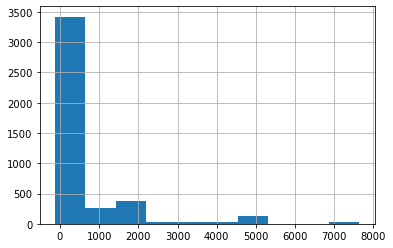

In [175]:
# little preprocessing

boughts_with_prices = pd.merge(successful_sessions, products_data, on="product_id", how="inner")
boughts_with_prices = boughts_with_prices.rename(columns={"price": "total_price"})

boughts_with_prices['sum_after_discount'] = boughts_with_prices['total_price'] * (1 - boughts_with_prices['offered_discount'] / 100)
boughts_with_prices

boughts_with_prices[boughts_with_prices['total_price'] == boughts_with_prices['total_price'].max()].product_name.value_counts()


# dropping IPAD MINI Outliers

boughts_with_prices = boughts_with_prices.drop(
    boughts_with_prices[boughts_with_prices.total_price > 1000000].index
)

boughts_with_prices.total_price.hist()

spendings_per_user = boughts_with_prices.groupby("user_id").sum()['sum_after_discount']

spendings_per_user = pd.DataFrame(spendings_per_user)
spendings_per_user['user_id'] = spendings_per_user.index
spendings_per_user.reset_index(drop=True, inplace=True)

In [176]:
print(spendings_per_user)
users_descr

users_descr1 = pd.merge(users_descr, spendings_per_user, on="user_id", how="outer")
users_descr1
users_descr1['sum_after_discount'].fillna(0, inplace=True)

     sum_after_discount  user_id
0            24240.5110    102.0
1             2635.6820    103.0
2            12276.2215    104.0
3             5106.6495    105.0
4            19254.1225    106.0
..                  ...      ...
192          17980.7395    297.0
193          18535.2705    298.0
194           8846.9315    299.0
195          20850.3460    300.0
196          21346.1905    301.0

[197 rows x 2 columns]


In [177]:
users_descr1['avg_spending'] = users_descr1['sum_after_discount'] / users_descr1['num_buying_sessions']
users_descr1

# users_descr1.sum_after_discount.hist()
# users_descr1.avg_spending.hist()

users_descr1.sum_after_discount.describe()

count      200.000000
mean     12584.666035
std       8834.821860
min          0.000000
25%       5132.469500
50%      11645.471250
75%      19250.518750
max      44118.204500
Name: sum_after_discount, dtype: float64

### TOP 25 buyers by sum

In [178]:
users_descr1.sort_values('sum_after_discount', ascending=False).head(25)

,num_buying_sessions,user_id,name,city,street,sum_after_discount,avg_spending
150,47.0,253.0,Urszula Cyman,Radom,ul. Kilińskiego 32,44118.2045,938.685202
92,49.0,194.0,Dagmara Paździora,Szczecin,al. Słowianska 96,37832.1860,772.085429
81,38.0,183.0,Jan Chomiuk,Warszawa,aleja Wiśniowa 96/74,37749.8570,993.417289
18,34.0,120.0,Adam Wielgo,Konin,ul. Chabrowa 634,36874.5480,1084.545529
146,46.0,249.0,Łukasz Barej,Radom,al. Mazowiecka 586,33220.5645,722.186185
36,45.0,138.0,Ada Rajtar,Szczecin,al. Promienna 69/40,31504.5060,700.100133
91,41.0,193.0,Dagmara Samiec,Kutno,ul. Mała 688,31474.0265,767.659183
164,46.0,268.0,Albert Świt,Radom,pl. Wesoła 63,30497.1890,662.982370
154,25.0,258.0,Marcel Kolka,Konin,al. Maczka 775,29035.9915,1161.439660
43,35.0,145.0,Igor Karmelita,Radom,pl. Piastowska 10,28266.2630,807.607514


### TOP 25 buyers by avg spending

In [179]:
users_descr1.sort_values('avg_spending', ascending=False).head(25)

,num_buying_sessions,user_id,name,city,street,sum_after_discount,avg_spending
49,1.0,151.0,Stanisław Pasieczna,Warszawa,ul. Batalionów Chłopskich 91,4368.1000,4368.100000
140,3.0,243.0,Jerzy Satora,Gdynia,aleja Rataja 971,9656.7910,3218.930333
170,2.0,274.0,Jeremi Skała,Warszawa,ulica Konwaliowa 28,5126.0000,2563.000000
175,5.0,279.0,Franciszek Warzybok,Radom,al. Wiklinowa 71,10090.9215,2018.184300
83,4.0,185.0,Rafał Natanek,Warszawa,ul. Długosza 63,7983.1810,1995.795250
138,4.0,241.0,Ada Stein,Warszawa,pl. Konopnickiej 04,6668.7700,1667.192500
174,3.0,278.0,Blanka Leśna,Police,plac Słonecznikowa 44/90,4324.9700,1441.656667
47,19.0,149.0,Konstanty Łobacz,Mielec,ul. Prusa 19,24042.5065,1265.395079
167,9.0,271.0,Marcin Szmalec,Warszawa,plac Diamentowa 73/33,11122.4400,1235.826667
131,12.0,233.0,Sonia Miśkowiec,Warszawa,pl. Składowa 73,14057.7500,1171.479167
